<div class="markdown-google-sans">

# **Collect CEFR Lexical Dataset for Lexical Evaluation 🤗**

Collect CEFR Lexical Dataset for Lexical Evaluation from CEFR-SP, CERD, Kaggle and Hugging Face.

</div>

<div class="markdown-google-sans">

## **Information 😲**
</div>

**Title:** Collect CEFR Lexical Dataset for Lexical Evaluation<br>
**Description:** Collect CEFR Lexical Dataset for Lexical Evaluation from CEFR-SP, CERD, Kaggle and Hugging Face<br>
**Code Writer:** Hafid Ikhsan Arifin<br>
**Date created:** 2023/07/19<br>
**Last modified:** 2023/07/22 (10:40 AM)<br> <!-- Edit Here -->
**Version:** 1.4.0<br> <!-- Edit Here -->

**Notebook:**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1m7vMsCtwpM9i9A2zfNAVnhRHQVWGmuSd?usp=sharing)
[![GitHub watchers](https://img.shields.io/github/watchers/Naereen/StrapDown.js.svg?style=social&label=Watch&maxAge=2592000)](https://github.com/IELTSSpeakingApplication/MachineLearning)

**Dataset:**

[![Open in Spaces](https://huggingface.co/datasets/huggingface/badges/raw/main/open-in-hf-spaces-sm.svg)](https://huggingface.co/hafidikhsan)

<div class="markdown-google-sans">

## **Introduction 🤔**
</div>

[CEFR](https://www.cambridgeenglish.org/exams-and-tests/cefr/) is one of the international standards made by the university of Cambridge which is commonly used to describe language proficiency. in CEFR there is 6 band (A1, A2, B1, B2, C1, C2). For my task, there are several dataset that can be use for CEFR Lexical Dataset.

1.   [CEFR-SP](https://github.com/yukiar/CEFR-SP)<br>[CEFR-SP](https://github.com/yukiar/CEFR-SP) provides 17.000 English sentences annotated with CEFR levels assigned by English-education professionals.
2.   [Kaggle CEFR Levelled English Texts](https://www.kaggle.com/datasets/amontgomerie/cefr-levelled-english-texts)<br>[Kaggle CEFR Levelled English Texts](https://www.kaggle.com/datasets/amontgomerie/cefr-levelled-english-texts) is a dataset of about 1500 English texts labelled with Common European Framework of Reference (CEFR) levels (A1, A2, B1, B2, C1, C2) representing the difficulty of the text for reading comprehension for language learners. The content is a mixture of dialogues, descriptions, short stories, newspaper stories, and other articles (or shorter extracts from stories/articles).
3.   [CERD](https://ilexir.co.uk/datasets/index.html)<br>[CERD](https://ilexir.co.uk/datasets/index.html) (The Cambridge English Readability Dataset) is composed of reading passages from the five main suite Cambridge English Exams (KET/A2, PET/B1, FCE/B2, CAE/C1, CPE/C2). These five exams are targeted at learners at A2-C2 levels of the Common European Framework of Reference (CEFR). The documents are harvested from all the tasks in the past reading papers for each of the exams. The Cambridge English Exams are designed for L2 learners specifically and the A2-C2 levels assigned to each reading paper can be treated as the level of reading difficulty of the documents for the L2 learners.
4.   [Hugging Face](https://huggingface.co/datasets/sebastiaan/test-cefr)<br>[Hugging Face](https://huggingface.co/datasets/sebastiaan/test-cefr) test CEFR is compose text classification and text generator of english CEFR.


In this notebook I will create CEFR Lexical dataset. There are several processes that will be carried out during create the dataset.

1.  Install and import library
2.  Access drive from colab
3.  Collect datasets
4.  Preprocessing datasets
5.  Cutting datasets
6.  Check datasets
7.  Convert to datasets Hugging Face
8.  Cast column
9.  Split dataset
10. Dataset visualization
11. Save datasets.

This dataset will be available in my Hugging Face Hub profile [hafidikhsan](https://huggingface.co/hafidikhsan).

Let's code 😋

<div class="markdown-google-sans">

## **Preparation 🧐**
</div>

The first step I will do is install required library.

In [1]:
# Install required library
%%capture
!pip install datasets

In [2]:
#@title Check installed library
import datasets

try:
    datasets_version = datasets.__version__
    print("Libraries installed")
except:
    print("Libraries not installed")

Libraries installed


Next, I will import required libraries.

In [3]:
# Import library
import os
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from google.colab import drive
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from huggingface_hub import notebook_login
from wordcloud import WordCloud, STOPWORDS
from datasets import Dataset, DatasetDict, load_dataset, ClassLabel

nltk.download("stopwords")
nltk.download("punkt")

stop = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
# Make pandas dataframe big
pd.set_option("display.max_colwidth", None)

Next, I will import drive folder in my colab to load dataset and save preprocessing result.

In [5]:
# Drive Access
drive.mount("/content/drive")

Mounted at /content/drive


To make the process easier, I will define some global parameters for creating dataset.

In [6]:
# Define global parameter
COLAB_BASE_PATH = "/content/"

CEFRSP_DATASET_DRIVE_PATH = '''/content/drive/MyDrive/"Final Project"/"Machine Learning"/Lexical/Testing/Dataset/CEFR-SP.zip'''
KAGGLE_JSON = '''/content/drive/MyDrive/"Final Project"/"Machine Learning"/Lexical/Testing/Dataset/kaggle.json'''
CERD_DATASET_DRIVE_PATH = '''/content/drive/MyDrive/"Final Project"/"Machine Learning"/Lexical/Testing/Dataset/Readability_dataset_clean.zip'''
HUGGING_FACE_DATASET = "sebastiaan/test-cefr"

DRIVE_PATH = '''/content/drive/MyDrive/"Final Project"/"Machine Learning"/Lexical/Testing/Dataset/"Cut V3"/'''

TARGET_HUGGING_FACE_DATASET_NAME = "cefr-lexical-dataset-cut-v3"
PRIVATE = True

<div class="markdown-google-sans">

## **Preprocessing 🤯**
</div>

First thing I do before create dataset is load the original dataset.

First I load the [CEFR-SP](https://github.com/yukiar/CEFR-SP) dataset from my drive to colab and then unzip the dataset.

In [7]:
# Copy dataset
!cp -r {CEFRSP_DATASET_DRIVE_PATH} {COLAB_BASE_PATH}

In [8]:
# Unzip dataset
!unzip "CEFR-SP.zip"

Archive:  CEFR-SP.zip
   creating: SCoRE/
 extracting: SCoRE/CEFR-SP_SCoRE_test.txt  
   creating: Wiki-Auto/
 extracting: Wiki-Auto/CEFR-SP_Wikiauto_test.txt  
 extracting: README.md               
 extracting: SCoRE/CEFR-SP_SCoRE_dev.txt  
 extracting: SCoRE/CEFR-SP_SCoRE_train.txt  
 extracting: Wiki-Auto/CEFR-SP_Wikiauto_dev.txt  
 extracting: Wiki-Auto/CEFR-SP_Wikiauto_train.txt  


In [9]:
# Path init CEFR-SP dataset SCoRE
SCoRE_val = "SCoRE/CEFR-SP_SCoRE_dev.txt"
SCoRE_test = "SCoRE/CEFR-SP_SCoRE_test.txt"
SCoRE_train = "SCoRE/CEFR-SP_SCoRE_train.txt"

In [10]:
# Path init CEFR-SP dataset WikiAuto
WikiAuto_val = "Wiki-Auto/CEFR-SP_Wikiauto_dev.txt"
WikiAuto_test = "Wiki-Auto/CEFR-SP_Wikiauto_test.txt"
WikiAuto_train = "Wiki-Auto/CEFR-SP_Wikiauto_train.txt"

Next, I will load another dataset that is dataset from [Kaggle CEFR Levelled English Texts](https://www.kaggle.com/datasets/amontgomerie/cefr-levelled-english-texts).

In [11]:
# Copy Kaggle json
!cp -r {KAGGLE_JSON} {COLAB_BASE_PATH}

In [12]:
# Save Kaggle API key to colab
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
# Download dataset
!kaggle datasets download amontgomerie/cefr-levelled-english-texts

  0% 0.00/1.36M [00:00<?, ?B/s]
100% 1.36M/1.36M [00:00<00:00, 71.1MB/s]


In [14]:
# Unzip dataset
!unzip "cefr-levelled-english-texts.zip"

Archive:  cefr-levelled-english-texts.zip
  inflating: cefr_leveled_texts.csv  


In [15]:
# Define path
kaggle_path = "cefr_leveled_texts.csv"

Next, I will load another dataset that is [CERD](https://ilexir.co.uk/datasets/index.html) dataset.

In [16]:
# Copy dataset
!cp -r {CERD_DATASET_DRIVE_PATH} {COLAB_BASE_PATH}

In [17]:
# Unzip data
!unzip "Readability_dataset_clean.zip"

Archive:  Readability_dataset_clean.zip
   creating: Readability_dataset_clean/
  inflating: __MACOSX/._Readability_dataset_clean  
  inflating: Readability_dataset_clean/.DS_Store  
  inflating: __MACOSX/Readability_dataset_clean/._.DS_Store  
   creating: Readability_dataset_clean/CAE/
  inflating: __MACOSX/Readability_dataset_clean/._CAE  
   creating: Readability_dataset_clean/PET/
  inflating: __MACOSX/Readability_dataset_clean/._PET  
   creating: Readability_dataset_clean/CPE/
  inflating: __MACOSX/Readability_dataset_clean/._CPE  
   creating: Readability_dataset_clean/FCE/
  inflating: __MACOSX/Readability_dataset_clean/._FCE  
   creating: Readability_dataset_clean/KET/
  inflating: __MACOSX/Readability_dataset_clean/._KET  
  inflating: Readability_dataset_clean/CAE/29.txt  
  inflating: __MACOSX/Readability_dataset_clean/CAE/._29.txt  
  inflating: Readability_dataset_clean/CAE/15.txt  
  inflating: __MACOSX/Readability_dataset_clean/CAE/._15.txt  
  inflating: Readability_

In [18]:
# Define path
cerd_path = "Readability_dataset_clean"

Next, I will load another dataset that is dataset from [Hugging Face](https://huggingface.co/datasets/sebastiaan/test-cefr).

In [19]:
# Import dataset from Hugging Face
hugging_face_dataset = load_dataset(HUGGING_FACE_DATASET)

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset test-cefr downloaded and prepared to /root/.cache/huggingface/datasets/sebastiaan___test-cefr/default/1.1.0/4ece2d47bd5959f302268b68b2fd1fc0e0b43efb0ce1e7edba8e642e8349c4c9. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [20]:
# Define dataset
hugging_face_train = hugging_face_dataset["train"]
hugging_face_test = hugging_face_dataset["test"]
hugging_face_val = hugging_face_dataset["validation"]

Next step, I will collect all dataset into a dataframe. To do this process first initialize the dataframe column.

In [21]:
# Initialize columns
columns = ["Text", "Level"]

Next step is collect CEFR-SP dataset to a dataframe, to do this first define some function to read dataset.

In [22]:
# Define function to read dataset
def read_cefr_corpus(corpus_path):
    levels, sents = [], []
    lv_indices = {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}

    for path in corpus_path:
        with open(path) as f:
            all_texts = f.readlines()

        for line in all_texts:
            array = line.strip().split("\t")
            annotator_x = int(array[1])
            annotator_y = int(array[2])

            if abs(annotator_x - annotator_y) <= 1:
                lv = max(annotator_x, annotator_y) - 1

                levels.append(lv)
                sents.append(array[0])
                lv_indices[lv].append(len(sents) - 1)

    return np.array(levels), sents, lv_indices

In [23]:
# Define function to parsing dataset to numpy
def parsing_to_numpy(levels, sents):
    all = []

    for i in range(len(sents)):
        text = sents[i]
        level = levels[i]

        temp = []
        temp.append(text)
        temp.append(level)

        np.array(temp)
        all.append(temp)

    return np.array(all)

Then get the dataset and save in a variable.

In [24]:
# Read all CEFR-SP dataset
All_levels_val, All_sents_val, All_lv_indices_val = read_cefr_corpus([SCoRE_val, WikiAuto_val])
All_levels_test, All_sents_test, All_lv_indices_test = read_cefr_corpus([SCoRE_test, WikiAuto_test])
All_levels_train, All_sents_train, All_lv_indices_train = read_cefr_corpus([SCoRE_train, WikiAuto_train])

Then parsing the dataset to numpy.

In [25]:
# Parsing CEFR-SP dataset to numpy
cefr_sp_train = parsing_to_numpy(All_levels_train, All_sents_train)
cefr_sp_val = parsing_to_numpy(All_levels_val, All_sents_val)
cefr_sp_test = parsing_to_numpy(All_levels_test, All_sents_test)

Then convert from numpy to dataframe.

In [26]:
# Convert numpy to dataframe
df_cefr_sp_train = pd.DataFrame(cefr_sp_train, columns=columns)
df_cefr_sp_val = pd.DataFrame(cefr_sp_val, columns=columns)
df_cefr_sp_test = pd.DataFrame(cefr_sp_test, columns=columns)

Then repair the label in `level` column

In [27]:
# Replace value in level column
df_cefr_sp_train["Level"] = df_cefr_sp_train["Level"].replace(["0", "1", "2", "3", "4", "5"], ["A1", "A2", "B1", "B2", "C1", "C2"])
df_cefr_sp_val["Level"] = df_cefr_sp_val["Level"].replace(["0", "1", "2", "3", "4", "5"], ["A1", "A2", "B1", "B2", "C1", "C2"])
df_cefr_sp_test["Level"] = df_cefr_sp_test["Level"].replace(["0", "1", "2", "3", "4", "5"], ["A1", "A2", "B1", "B2", "C1", "C2"])

Last merging the dataset in a singel dataframe.

In [28]:
# Merging All CEFR-SP dataset
df_cefr_sp_all = pd.concat([df_cefr_sp_train, df_cefr_sp_val, df_cefr_sp_test])

Next I will collect Kaggle dataset into a dataframe.

In [29]:
# Initialize dataset from csv
df_kaggle = pd.read_csv(kaggle_path)

In [30]:
# Rename column name
df_kaggle.rename(columns={"label":columns[1], "text":columns[0]}, inplace=True)

Next I will collect CERD dataset into a dataframe. To do this first define some function to read dataset.

In [31]:
# Define function to parsing dataset to numpy
def parse_files_to_numpy(sub_dirs, parent_dir):
    dataset = np.empty((0,2))
    char_remov = ["\t", "\n", "..", "...", "  ", "(", ")", ":", "?", "!", "@", "#", "*", "$", "%", "&", "[", "]", "{", "}", "_", "+", "/", "|", "=" ]

    for sub_dir in sub_dirs:
        for file_name in os.scandir(os.path.join(parent_dir, sub_dir)):
            print("Actual File Name: ", file_name.path)
            with open(file_name.path) as f:
                lines = f.readlines()

            for text in lines:
                for char in char_remov:
                    text = text.replace(char, "")

                categories = ""

                if sub_dir == "KET":
                    categories = "A2"
                elif sub_dir == "PET":
                    categories = "B1"
                elif sub_dir == "FCE":
                    categories = "B2"
                elif sub_dir == "CAE":
                    categories = "C1"
                else:
                    categories = "C2"

                new_data = np.hstack([text, categories])
                dataset = np.vstack([dataset, new_data])

        print("Extracted features from %s, done" % (sub_dir))

    return np.array(dataset)

In [32]:
# Define CERD dataset path
cerd_subdirectories = os.listdir(cerd_path)
cerd_subdirectories.sort()
cerd_subdirectories.remove(".DS_Store")

print("CERD Subdirs:", cerd_subdirectories)

CERD Subdirs: ['CAE', 'CPE', 'FCE', 'KET', 'PET']


Then parsing dataset to numpy.

In [33]:
# Parsing dataset
cerd_numpy = parse_files_to_numpy(cerd_subdirectories, cerd_path)

Actual File Name:  Readability_dataset_clean/CAE/51.txt
Actual File Name:  Readability_dataset_clean/CAE/53.txt
Actual File Name:  Readability_dataset_clean/CAE/2.txt
Actual File Name:  Readability_dataset_clean/CAE/55.txt
Actual File Name:  Readability_dataset_clean/CAE/16.txt
Actual File Name:  Readability_dataset_clean/CAE/50.txt
Actual File Name:  Readability_dataset_clean/CAE/47.txt
Actual File Name:  Readability_dataset_clean/CAE/27.txt
Actual File Name:  Readability_dataset_clean/CAE/66.txt
Actual File Name:  Readability_dataset_clean/CAE/43.txt
Actual File Name:  Readability_dataset_clean/CAE/24.txt
Actual File Name:  Readability_dataset_clean/CAE/52.txt
Actual File Name:  Readability_dataset_clean/CAE/62.txt
Actual File Name:  Readability_dataset_clean/CAE/63.txt
Actual File Name:  Readability_dataset_clean/CAE/5.txt
Actual File Name:  Readability_dataset_clean/CAE/35.txt
Actual File Name:  Readability_dataset_clean/CAE/20.txt
Actual File Name:  Readability_dataset_clean/CAE/4

Last convert numpy to dataframe.

In [34]:
# Convert numpy to dataframe
df_cerd = pd.DataFrame(cerd_numpy, columns=columns)

Next I will collect Hugging Face dataset into a dataframe.

In [35]:
# Define variabel
texts_hugging_face = []
labels_hugging_face = []
special_characters = '"'

Then define some function to read dataset.

In [36]:
# Define function to get data from Dataset
def parsing_from_dataset(dataset):
    if len(dataset["label"]) == 2:
        if any(c in special_characters for c in dataset["prompt"]):
            if dataset["prompt"].count(special_characters) == 2 :
                split_text = dataset["prompt"].split(special_characters)

                texts_hugging_face.append(split_text[1])
                labels_hugging_face.append(dataset["label"].upper())
            else:
                split_text = dataset["prompt"].split(special_characters)

                if len(split_text) == 5:
                    temp = split_text[1] + special_characters + split_text[2] + special_characters + split_text[3]

                    texts_hugging_face.append(temp)
                    labels_hugging_face.append(dataset["label"].upper())
        else:
            split_text = dataset["prompt"].split(":")

            texts_hugging_face.append(split_text[-1])
            labels_hugging_face.append(dataset["label"].upper())

Then mappting to dataset.

In [37]:
# Mapping to train dataset
hugging_face_train.map(parsing_from_dataset)

Map:   0%|          | 0/240440 [00:00<?, ? examples/s]

Dataset({
    features: ['prompt', 'label'],
    num_rows: 240440
})

In [38]:
# Mapping to validation dataset
hugging_face_val.map(parsing_from_dataset)

Map:   0%|          | 0/30225 [00:00<?, ? examples/s]

Dataset({
    features: ['prompt', 'label'],
    num_rows: 30225
})

In [39]:
# Mapping to test dataset
hugging_face_test.map(parsing_from_dataset)

Map:   0%|          | 0/29335 [00:00<?, ? examples/s]

Dataset({
    features: ['prompt', 'label'],
    num_rows: 29335
})

Last convert to dataframe.

In [40]:
# Convert to dataframe
df_hugging_face = pd.DataFrame({columns[0]:texts_hugging_face, columns[1]:labels_hugging_face})

Next I will merge all dataset into one dataframe.

In [41]:
# Merging all dataset
df_all = pd.concat([df_cefr_sp_all, df_kaggle, df_cerd, df_hugging_face])

Next process is preprocessing dataset. First I want to remove some unwanted character. First I will define some variable or function to remove some unwanted character.

In [42]:
# Define function remove unwanted character
def remove_char(text):
    char_remov1 = ["\t", "\n"]
    char_remov2 = ["\ufeff", "...", "   ", "..", "  ", "(", ")", ":", "?", "!", "@", "#", "*", "$", "%", "&", "[", "]", "{", "}", "_", "+", "/", "|", "=" ]

    for char in char_remov1:
        text = text.replace(char, " ")
    for char in char_remov2:
        text = text.replace(char, "")

    return text

Then mapping to all dataframe.

In [43]:
# Apply to dataset
df_all["Text"] = df_all["Text"].apply(lambda x: remove_char(x))

Next process is calculate length of text.

In [44]:
# Add new column for length sentence dataset
df_all["Text Count"] = df_all["Text"].str.split().map(len)

Next process is delete unwanted row, an data that have less text.

In [45]:
# Delete unwanted value
df_all_null = df_all.loc[df_all["Text"]!=""]
df_all_null = df_all_null.loc[df_all_null["Text"]!=" "]
df_all = df_all_null.loc[~df_all_null["Text Count"].isin([0,1,2,3])]

Next process is cleaning the dataset.

In [46]:
# Define function preprocess
def word_count_func(text):
    # Delete url
    url = re.compile(r"https?://\S+|www\.\S+")
    text = url.sub(r"",text)

    # Delete html tag
    html = re.compile(r"<.*?>")
    text = html.sub(r"''",text)

    # Delet emoji
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r"", text)

    # Delete str punct
    table = str.maketrans("","",string.punctuation)
    text = text.translate(table)

    return text

In [47]:
# Apply to dataset
df_all["Text"] = df_all["Text"].apply(lambda x:word_count_func(x))

<ipython-input-47-9f470072d60f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["Text"] = df_all["Text"].apply(lambda x:word_count_func(x))


Next I will sellect the data that have word count under 500 word.

In [48]:
# Select data
df_all = df_all.loc[df_all["Text Count"] <= 500]

Next I will cut the dataset to balance the dataset

In [49]:
# Get data in each class
df_a1 = df_all[df_all["Level"] == "A1"]
df_a2 = df_all[df_all["Level"] == "A2"]
df_b1 = df_all[df_all["Level"] == "B1"]
df_b2 = df_all[df_all["Level"] == "B2"]
df_c1 = df_all[df_all["Level"] == "C1"]
df_c2 = df_all[df_all["Level"] == "C2"]

In [50]:
# Display class
print("A1   :", len(df_a1))
print("A2   :", len(df_a2))
print("B1   :", len(df_b1))
print("B2   :", len(df_b2))
print("C1   :", len(df_c1))
print("C2   :", len(df_c2))

A1   : 28567
A2   : 29465
B1   : 31961
B2   : 32842
C1   : 31806
C2   : 921


In [51]:
# Define sample
sample_data = 10000

In [52]:
# Select data every class
df_a1 = df_all[df_all["Level"] == "A1"].sample(n = sample_data)
df_a2 = df_all[df_all["Level"] == "A2"].sample(n = sample_data)
df_b1 = df_all[df_all["Level"] == "B1"].sample(n = sample_data)
df_b2 = df_all[df_all["Level"] == "B2"].sample(n = sample_data)
df_c1 = df_all[df_all["Level"] == "C1"].sample(n = sample_data)
df_c2 = df_all[df_all["Level"] == "C2"]

In [53]:
# Merging selected dataset
df_all = pd.concat([df_a1, df_a2, df_b1, df_b2, df_c1, df_c2])

Next I will display dataset information.

In [54]:
# Display dataset
df_all.head(10)

,Text,Level,Text Count
118134,As sometimes happens to the good stories in science virtually the entire edifice collapsed in the space of just five years,A1,21
19963,Cocoa and kale make a nice match in smoothies shakes and desserts,A1,12
102462,Its time for bed Jodi told Maddy,A1,7
89168,Hence the Keystone Kops chasing the bus down the road,A1,10
84841,When I pull back to look at her she grins and tugs the cloth free from my collar in a single motion,A1,22
145673,On most evenings they sampled Hampsteads restaurants returning home to read and listen to music,A1,15
92097,The conclusions are not straightforward,A1,5
53266,Therefore when you say sadness I cant do anything to sadness,A1,11
140941,Allow the sweet sap to accumulate,A1,6
122199,The template contains a tag with the same name,A1,9


In [55]:
# Display dataset information
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50921 entries, 118134 to 1444
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        50921 non-null  object
 1   Level       50921 non-null  object
 2   Text Count  50921 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [56]:
# Check isnull in dataset
df_all.isnull().any()

Text          False
Level         False
Text Count    False
dtype: bool

Next I will convert dataframe to dataset and split the dataset.

In [57]:
# Pandas to dataset
dataset = Dataset.from_pandas(df_all)

Before split dataset first I convert to ClassLabel in column `Level`.

In [58]:
# Get labels
labels = df_all["Level"].unique().tolist()

In [59]:
# Create ClassLabels variabel
ClassLabels = ClassLabel(num_classes=len(labels), names=labels)

In [60]:
# Define label to id function
def map_label2id(data):
    data["Level"] = ClassLabels.str2int(data["Level"])

    return data

In [61]:
# Mapping to label to id function
dataset = dataset.map(map_label2id, batched=True)

Map:   0%|          | 0/50921 [00:00<?, ? examples/s]

In [62]:
# Cast dataset column
dataset = dataset.cast_column("Level", ClassLabels)

Casting the dataset:   0%|          | 0/50921 [00:00<?, ? examples/s]

In [63]:
# Get labels names
labels = dataset.features["Level"].names

# Create dict to save labels and id
label2id, id2label = dict(), dict()

# Looping to get label to id and id to label
for i, label in enumerate(labels):
    label2id[label] = str(i)
    id2label[str(i)] = label

In [64]:
# Display id to label
id2label

{'0': 'A1', '1': 'A2', '2': 'B1', '3': 'B2', '4': 'C1', '5': 'C2'}

In [65]:
# Display label to id
label2id

{'A1': '0', 'A2': '1', 'B1': '2', 'B2': '3', 'C1': '4', 'C2': '5'}

In [66]:
# Get list of label
label_list = dataset.unique("Level")

# Get number of label
num_labels = len(label_list)
num_labels

6

Next split dataset into 3 dataset.

In [67]:
# Split dataset
train_test_valid = dataset.train_test_split(test_size=0.3, stratify_by_column="Level")
test_valid = train_test_valid["test"].train_test_split(test_size=0.5, stratify_by_column="Level")

# Build new dataset from spliting dataset
dataset = DatasetDict({
    "train": train_test_valid["train"],
    "test": test_valid["test"],
    "validation": test_valid["train"],
})

Last Remove unwanted column in dataset.

In [68]:
# Remove column
dataset = dataset.remove_columns(["__index_level_0__"])

<div class="markdown-google-sans">

## **Datasets Visualization 🤩**
</div>

The next process in this notebook is dataset visualization. The first step in this process is display the dataset information.

In [69]:
# Show dataset information
dataset

DatasetDict({
    train: Dataset({
        features: ['Text', 'Level', 'Text Count'],
        num_rows: 35644
    })
    test: Dataset({
        features: ['Text', 'Level', 'Text Count'],
        num_rows: 7639
    })
    validation: Dataset({
        features: ['Text', 'Level', 'Text Count'],
        num_rows: 7638
    })
})

First I will display the word cloud in each class. First I will define function to display word cloud.

In [70]:
# Make function to display word cloud
def word_cloud_graf(cetegory):
    text = " ".join(cat for cat in df_all.loc[df_all["Level"]==cetegory]["Text"])

    # Generate word cloud
    word_cloud = WordCloud(
            width=4000,
            height=3000,
            random_state=1,
            background_color="white",
            collocations=False,
            stopwords=STOPWORDS,
            ).generate(text)

    # plot the word cloud image
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show()

    # Save data in image
    word_cloud.to_file(f"{cetegory} Word Cloud.png")

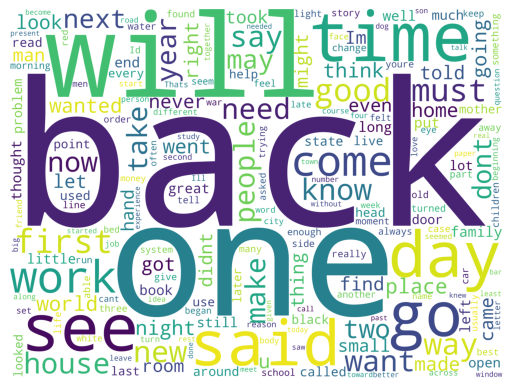

In [71]:
# Display word cloud
word_cloud_graf("A1")

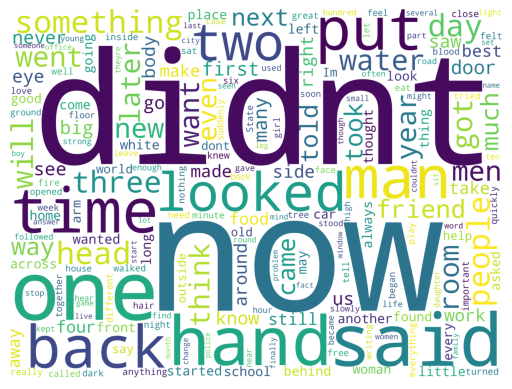

In [72]:
# Display word cloud
word_cloud_graf("A2")

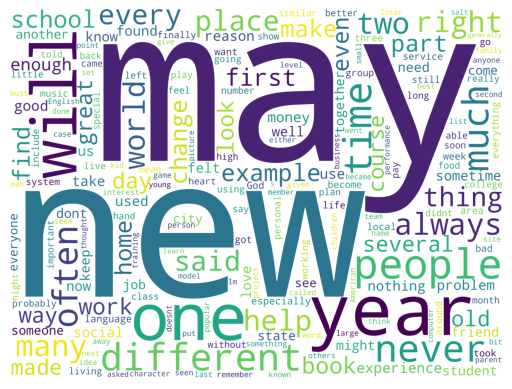

In [73]:
# Display word cloud
word_cloud_graf("B1")

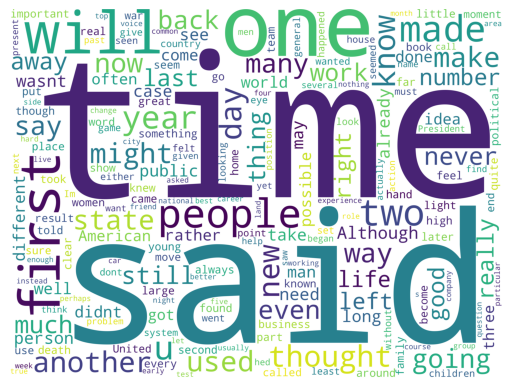

In [74]:
# Display word cloud
word_cloud_graf("B2")

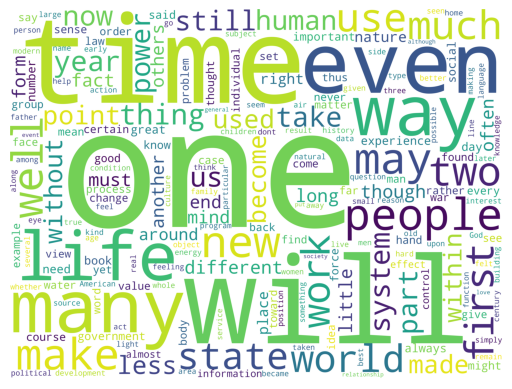

In [75]:
# Display word cloud
word_cloud_graf("C1")

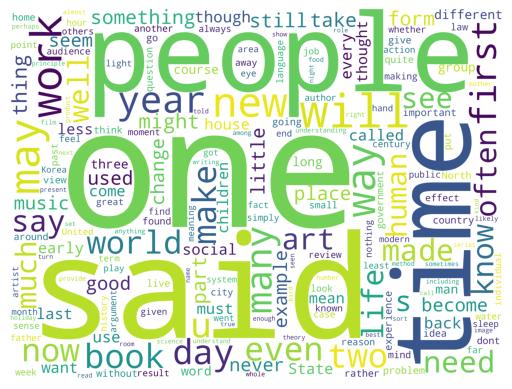

In [76]:
# Display word cloud
word_cloud_graf("C2")

Next I will display box plot.

In [77]:
# Define function for display boxplot
def box_plot(df, title):
    plt_title = title
    a1 = df["Text Count"].loc[df["Level"]=="A1"].values
    a2 = df["Text Count"].loc[df["Level"]=="A2"].values
    b1 = df["Text Count"].loc[df["Level"]=="B1"].values
    b2 = df["Text Count"].loc[df["Level"]=="B2"].values
    c1 = df["Text Count"].loc[df["Level"]=="C1"].values
    c2 = df["Text Count"].loc[df["Level"]=="C2"].values
    all = [a1, a2, b1, b2, c1, c2]

    fig = plt.figure(figsize= (12, 5))
    ax = fig.add_subplot(111)

    bp = ax.boxplot(all, labels=["A1", "A2", "B1", "B2", "C1", "C2"])

    plt.xlabel("Box Plot", size=15)
    plt.ylabel("Jumlah", size=15)
    plt.xticks(size=12)
    plt.title(plt_title, size=18)

    plt.show()
    fig.savefig(f"{title}.png", dpi=300.0)

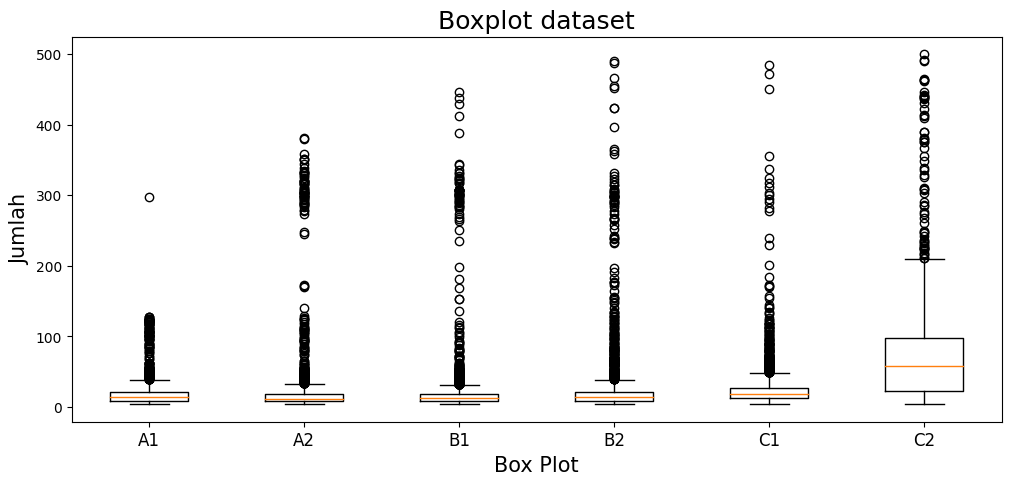

In [78]:
# Display boxplot
box_plot(df_all, "Boxplot dataset")

Next I will display the number of data in each class.

In [79]:
# Define function for display number of datasets
def vis_data(df, title):
    plt_title = title
    category_count = df["Level"].value_counts()
    categories = category_count.index

    fig = plt.figure(figsize= (12, 5))
    ax = fig.add_subplot(111)

    sns.barplot(x=categories, y=category_count )

    for a, p in enumerate(ax.patches):
        ax.annotate(f"{categories[a]}\n" + format(p.get_height(), ".0f"),
                    xy=(p.get_x() + p.get_width() / 2.0, p.get_height()),
                    xytext=(0,25),
                    size=13,
                    color="black" ,
                    ha="center",
                    va="center",
                    textcoords="offset points",
                    bbox=dict(boxstyle="round", facecolor="none", edgecolor="black", alpha=0.5)
                   )

    ax.margins(y=0.3)
    plt.xlabel("Level", size=15)
    plt.ylabel("Jumlah Data", size=15)
    plt.xticks(size=12)
    plt.title(plt_title, size=18)

    plt.show()
    fig.savefig(f"{title}.png", dpi=300.0,)

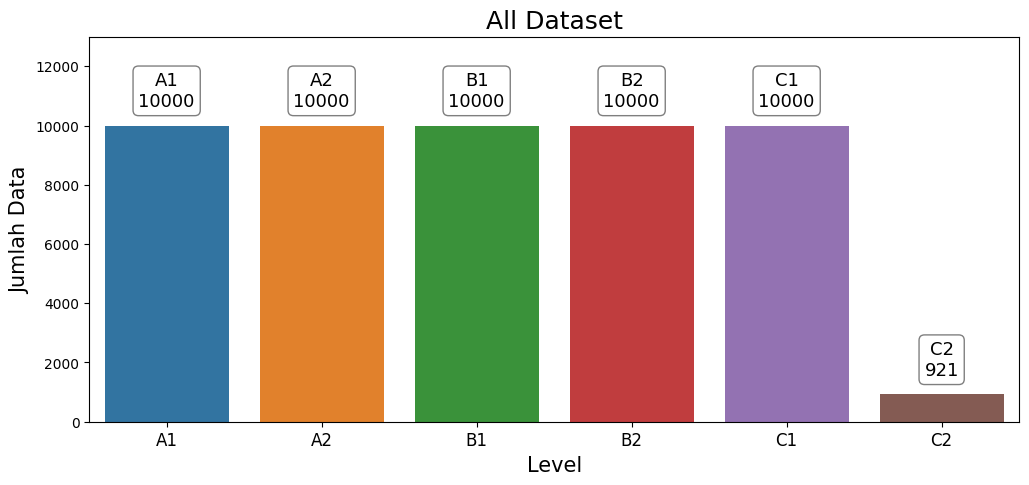

In [80]:
# Visualize all dataset
vis_data(df_all, "All Dataset")

Last in this section I will save preprocessing result in drive.

In [81]:
# Copy dataset
!cp -r "All Dataset.png" {DRIVE_PATH}
!cp -r "Boxplot dataset.png" {DRIVE_PATH}
!cp -r "A1 Word Cloud.png" {DRIVE_PATH}
!cp -r "A2 Word Cloud.png" {DRIVE_PATH}
!cp -r "B1 Word Cloud.png" {DRIVE_PATH}
!cp -r "B2 Word Cloud.png" {DRIVE_PATH}
!cp -r "C1 Word Cloud.png" {DRIVE_PATH}
!cp -r "C2 Word Cloud.png" {DRIVE_PATH}

<div class="markdown-google-sans">

## **Push Dataset to Hub 🥳**
</div>

After doing the whole process I'm going to save the dataset to [Hugging Face Dataset Hub](https://huggingface.co/datasets). To save the dataset in [Hugging Face Dataset Hub](https://huggingface.co/datasets), first I must login into Hugging Face Hub. To login into Hugging Face Hub I just call the [`notebook_login`](https://huggingface.co/docs/huggingface_hub/main/en/package_reference/login#huggingface_hub.notebook_login) function and copy the token into this notebook.

In [82]:
# Hugging Face login
notebook_login()

After successful login into Hugging Face Hub, last I can save the dataset to [Hugging Face Dataset Hub](https://huggingface.co/datasets) just call the [`push_to_hub`](https://huggingface.co/docs/huggingface_hub/main/en/guides/upload#pushtohub) in dataset and set dataset name and private value.

In [83]:
# Push dataset to hub
dataset.push_to_hub(TARGET_HUGGING_FACE_DATASET_NAME, private=PRIVATE)

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/36 [00:00<?, ?ba/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

Now dataset is ready to use for fine tune some task. Now this dataset is available in my Hugging Face Hub profile [hafidikhsan](https://huggingface.co/hafidikhsan).